## KAGGLE DOWNLOAD DATASET

## KAGGLE VERSION

In [19]:
!pip uninstall -y numpy
!pip install numpy --force-reinstall --no-cache-dir

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 324.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moabb 1.2.0 requires numpy<2.0,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [20]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [21]:
import os
import mne
import moabb
from moabb.datasets import PhysionetMI
from moabb.paradigms import MotorImagery
from moabb.evaluations import WithinSessionEvaluation
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mne.decoding import CSP
import kagglehub
import shutil

# Print MOABB version
print(f"MOABB version: {moabb.__version__}")

# Create MNE data directory
mne_data_dir = '/content/mne_data'
os.makedirs(mne_data_dir, exist_ok=True)
mne.set_config('MNE_DATA', mne_data_dir, set_env=True)

# First, download your Kaggle dataset
thebrokenvessel_adl_project_path = kagglehub.dataset_download('thebrokenvessel/adl-project')
kaggle_data_path = f'{thebrokenvessel_adl_project_path}/files'
print(f"Kaggle dataset downloaded to: {kaggle_data_path}")

# List the contents of the Kaggle dataset
print("\nContents of Kaggle dataset:")
os.system(f"ls -la {kaggle_data_path}")

# Create PhysionetMI object and see what it's looking for
dataset = PhysionetMI()
print("\nPhysioNetMI dataset info:")
print(f"Subject list: {dataset.subject_list[:5]}...")  # Show first 5 subjects

# Let's check how to get data for a single subject
subject = dataset.subject_list[0]
print(f"\nChecking data path for subject {subject}")
try:
    data_path = dataset.data_path(subject)
    print(f"Expected data path: {data_path}")

    # Create the directory structure if it doesn't exist
    os.makedirs(os.path.dirname(data_path), exist_ok=True)
except Exception as e:
    print(f"Error getting data path: {e}")

# Let's do a direct test with a simple evaluation
print("\nTrying WithinSessionEvaluation...")
try:
    # Limit to just 1 subject
    dataset.subject_list = dataset.subject_list[:1]

    # Create paradigm
    paradigm = MotorImagery(
        n_classes=2,
        fmin=8,
        fmax=30,
        channels=['C3', 'Cz', 'C4'],
        resample=160
    )

    # Create pipeline
    pipeline = make_pipeline(
        CSP(n_components=4),
        LDA()
    )

    # Create evaluation
    evaluation = WithinSessionEvaluation(
        paradigm=paradigm,
        datasets=[dataset],
        suffix='simple_test',
        overwrite=True
    )

    # Run just to see what happens
    try:
        print("Starting evaluation process...")
        results = evaluation.process({'CSP+LDA': pipeline})
        print("Evaluation successful!")
    except Exception as e:
        print(f"Evaluation error: {e}")

        # Try getting data the simplest way
        print("\nTrying to get data for a single subject...")
        try:
            X, labels, meta = paradigm.get_data(dataset=dataset, subjects=[subject])
            print(f"Data shape: X={X.shape}")
        except Exception as e:
            print(f"Data loading error: {e}")

            # Let's check version-specific documentation
            print("\nChecking MOABB version-specific behavior...")
            print("Here are the available methods for paradigm and dataset:")
            print(f"Paradigm methods: {dir(paradigm)}")
            print(f"Dataset methods: {dir(dataset)}")
except Exception as e:
    print(f"General error: {e}")

MOABB version: 1.2.0


Kaggle dataset downloaded to: /root/.cache/kagglehub/datasets/thebrokenvessel/adl-project/versions/1/files

Contents of Kaggle dataset:

PhysioNetMI dataset info:
Subject list: [1, 2, 3, 4, 5]...

Checking data path for subject 1
Expected data path: ['/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R01.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R02.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R04.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R08.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R12.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf', '/content/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf']
Error getting data path: expected str, bytes or os.PathLike object, not list

Trying WithinSessionEvaluation...
Starting evaluation process...


PhysionetMotorImagery-WithinSession:   0%|          | 0/1 [00:00<?, ?it/s]

Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
No hdf5_path provided, models will not be saved.
Computing rank from data with rank=None
    Using tolerance 4.9 (2.2e-16 eps * 3 dim * 7.4e+15  max singular value)
    Estimated rank (data): 3
    data: rank 3 computed from 3 data channels with 0 projectors
Reducing data rank from 3 -> 3
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.


PhysionetMotorImagery-WithinSession:   0%|          | 0/1 [00:01<?, ?it/s]

Evaluation error: multi_class must be in ('ovo', 'ovr')

Trying to get data for a single subject...
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']


Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Data shape: X=(174, 3, 481)


In [22]:
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Expanded pipeline options
pipelines = {
    'CSP+LDA': make_pipeline(
        CSP(n_components=4),
        LDA(solver='svd')
    ),
    'Riemannian+SVM': make_pipeline(
        Covariances(estimator='oas'),
        TangentSpace(),
        SVC(kernel='linear', probability=True)
    ),
    'CSP+RandomForest': make_pipeline(
        CSP(n_components=8),
        RandomForestClassifier(n_estimators=100)
    )
}

Loading PhysionetMI dataset...
Using subjects: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Setting up preprocessing pipeline with all available channels...
Getting preprocessed data...
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Data shape: X=(174, 64, 481), y=(174,)
Unique cla

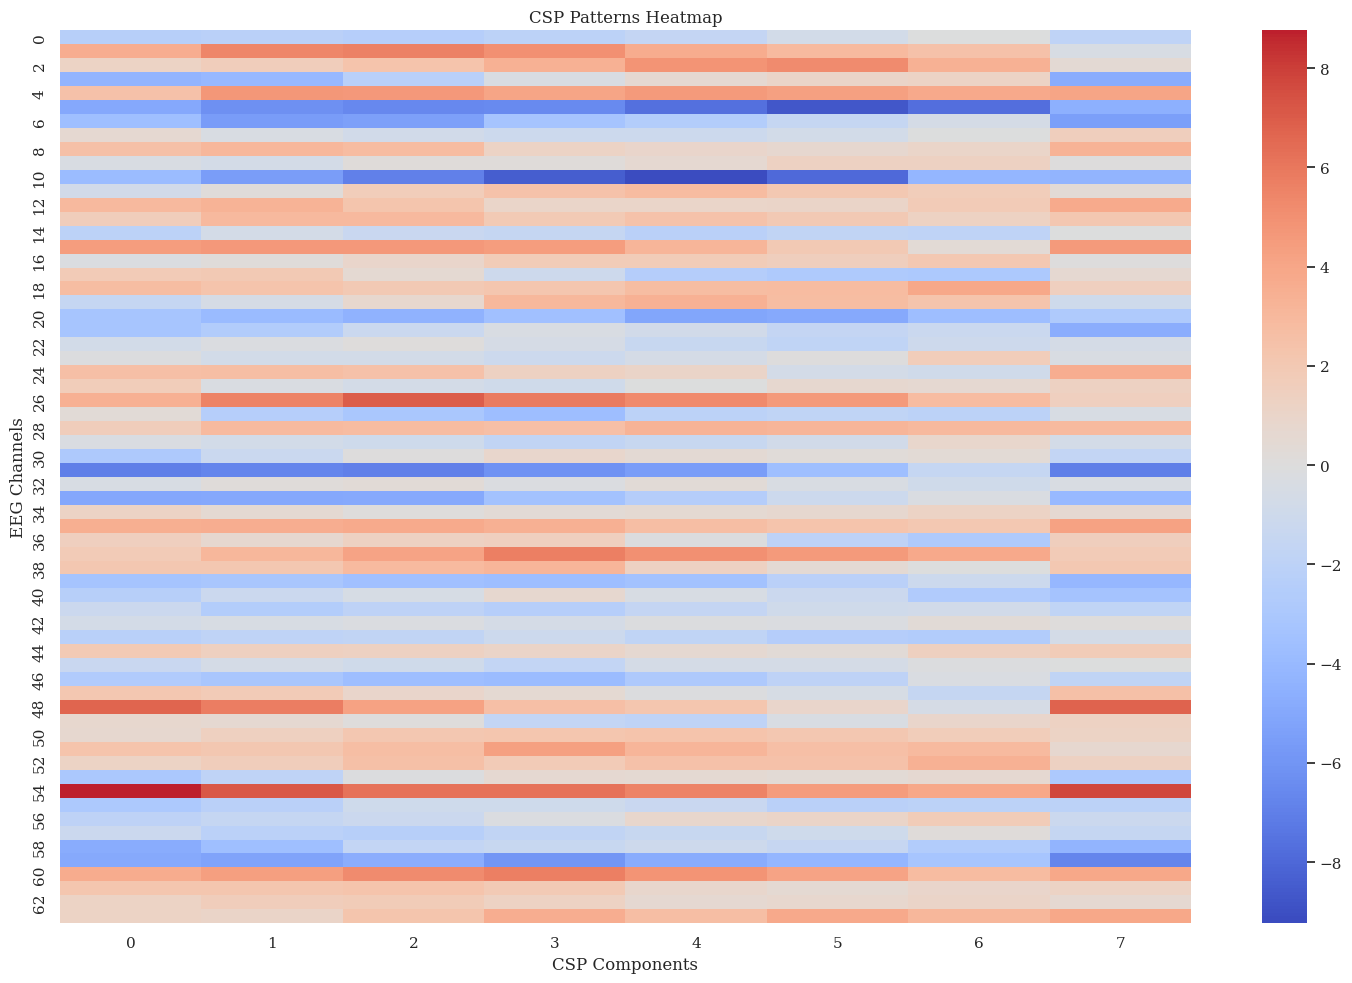

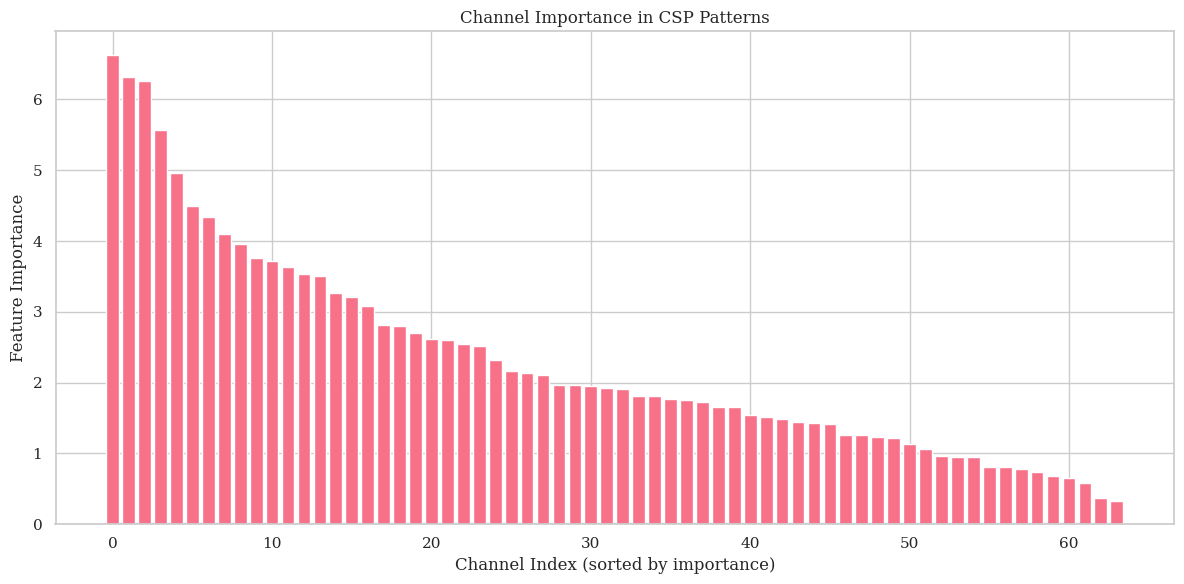


Top 10 most important channels (indices):
Rank 1: Channel 5, Importance: 6.6296
Rank 2: Channel 10, Importance: 6.3156
Rank 3: Channel 54, Importance: 6.2598
Rank 4: Channel 31, Importance: 5.5724
Rank 5: Channel 59, Importance: 4.9545
Rank 6: Channel 26, Importance: 4.5001
Rank 7: Channel 60, Importance: 4.3360
Rank 8: Channel 4, Importance: 4.0930
Rank 9: Channel 20, Importance: 3.9514
Rank 10: Channel 37, Importance: 3.7564


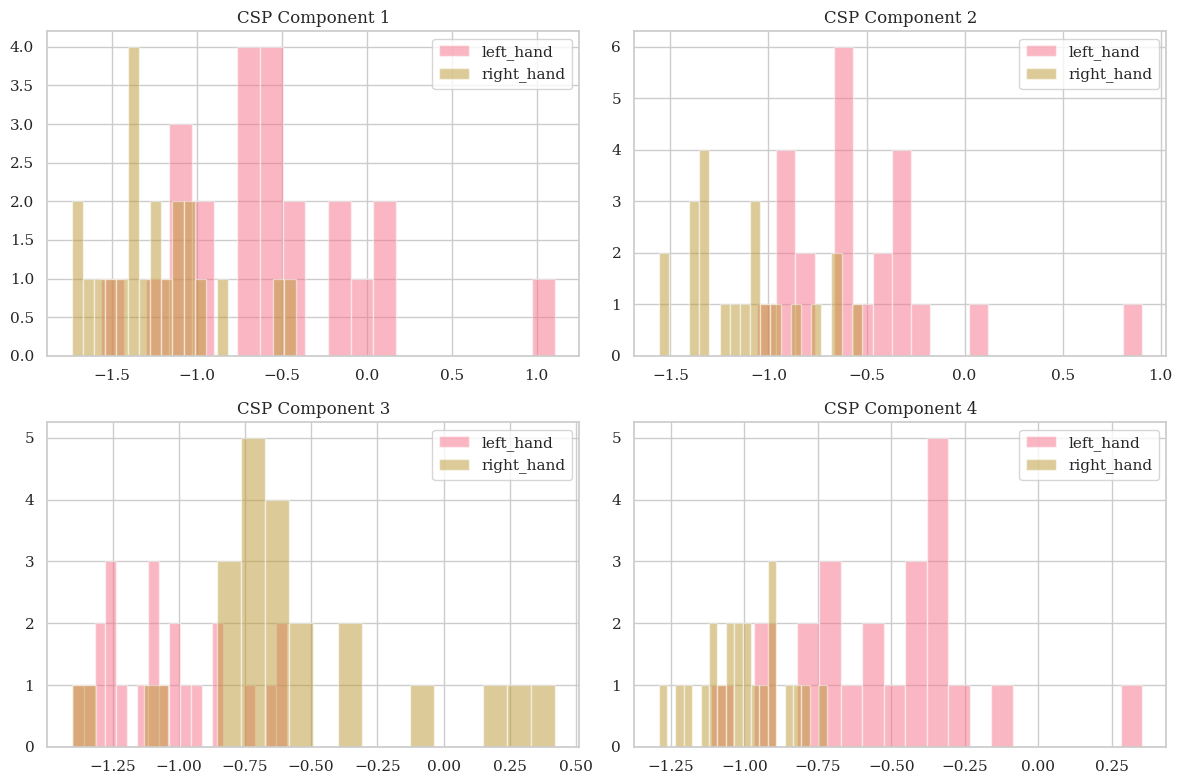


Evaluation and visualization completed!


In [26]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import moabb
from moabb.datasets import PhysionetMI
from moabb.paradigms import MotorImagery
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from mne.decoding import CSP
import warnings
import seaborn as sns

# Filter unnecessary warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Create MNE data directory
mne_data_dir = '/content/mne_data'
os.makedirs(mne_data_dir, exist_ok=True)
mne.set_config('MNE_DATA', mne_data_dir, set_env=True)

# Initialize dataset
print("Loading PhysionetMI dataset...")
dataset = PhysionetMI()

# Limit to a few subjects for faster testing
dataset.subject_list = dataset.subject_list[:]
print(f"Using subjects: {dataset.subject_list}")

# Set up the motor imagery paradigm with all channels
print("Setting up preprocessing pipeline with all available channels...")
paradigm = MotorImagery(
    n_classes=2,  # Binary classification
    fmin=8,       # Low frequency (mu rhythm)
    fmax=30,      # High frequency (beta rhythm)
    channels=None,  # Use all available channels
    resample=160    # Resample to 160 Hz
)

# Get the data for a subject
print("Getting preprocessed data...")
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])
print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"Unique classes: {np.unique(y)}")
print(f"Number of channels: {X.shape[1]}")

# Select only left_hand and right_hand classes for better performance
mask = np.logical_or(y == 'left_hand', y == 'right_hand')
if np.sum(mask) > 0:  # Check if we have these classes
    X = X[mask]
    y = y[mask]
    print(f"Filtered to binary classification (left_hand vs right_hand)")
    print(f"New data shape: X={X.shape}, y={y.shape}")

# Train a CSP+LDA model
print("\nTraining and evaluating a CSP+LDA model...")
from sklearn.model_selection import cross_val_score

# Create pipeline with appropriate number of components
n_components = 8  # Use more components with more channels
pipeline = make_pipeline(
    CSP(n_components=n_components),
    LDA(solver='svd')
)

# Perform cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Train final model
print("\nTraining final model and visualizing CSP patterns...")
pipeline.fit(X, y)
csp = pipeline.named_steps['csp']

# Since topographic plots aren't working, we'll visualize the patterns differently
# Let's create a heatmap of the CSP patterns
plt.figure(figsize=(15, 10))
patterns = csp.patterns_[:, :n_components]
sns.heatmap(patterns, cmap='coolwarm', center=0)
plt.xlabel('CSP Components')
plt.ylabel('EEG Channels')
plt.title('CSP Patterns Heatmap')
plt.tight_layout()
plt.show()

# Let's also visualize the feature importance of each channel
feature_importance = np.abs(patterns).mean(axis=1)
channel_importance_indices = np.argsort(feature_importance)[::-1]  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importance)), feature_importance[channel_importance_indices])
plt.xlabel('Channel Index (sorted by importance)')
plt.ylabel('Feature Importance')
plt.title('Channel Importance in CSP Patterns')
plt.tight_layout()
plt.show()

# Show most important channels
top_n = 10  # Show top 10 channels
most_important_channels = channel_importance_indices[:top_n]
print(f"\nTop {top_n} most important channels (indices):")
for i, idx in enumerate(most_important_channels):
    print(f"Rank {i+1}: Channel {idx}, Importance: {feature_importance[idx]:.4f}")

# Generate transformed features and plot their distribution
X_transformed = csp.transform(X)
plt.figure(figsize=(12, 8))
for class_name in np.unique(y):
    mask = y == class_name
    for i in range(min(4, n_components)):  # Plot first 4 components
        plt.subplot(2, 2, i+1)
        plt.hist(X_transformed[mask, i], bins=20, alpha=0.5, label=class_name)
        plt.legend()
        plt.title(f'CSP Component {i+1}')
plt.tight_layout()
plt.show()

print("\nEvaluation and visualization completed!")

MOABB version: 1.2.0
MNE version: 1.9.0
Loading PhysionetMI dataset...
Using subjects: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]
Setting up preprocessing pipeline...
Getting preprocessed data...
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['left_hand', 'rest', 'right_hand']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Used Annotations descriptions: ['feet', 'hands', 'rest']
Data shape: X=(174, 64, 481), y=(174,

<ipython-input-25-9bb26940ce61>:154: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, labels=list(methods.keys()))


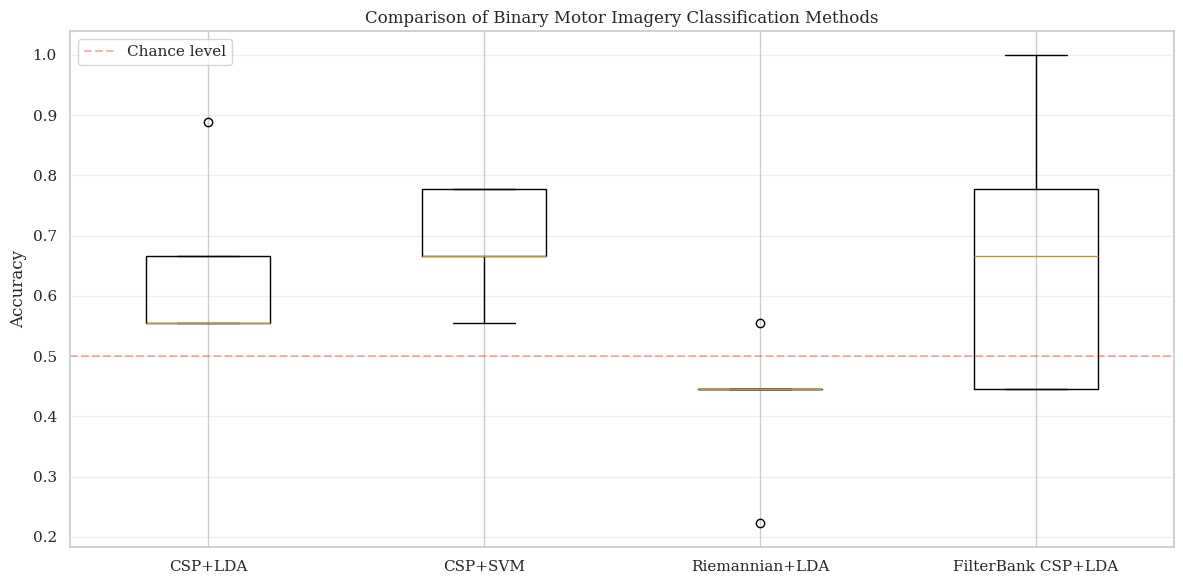

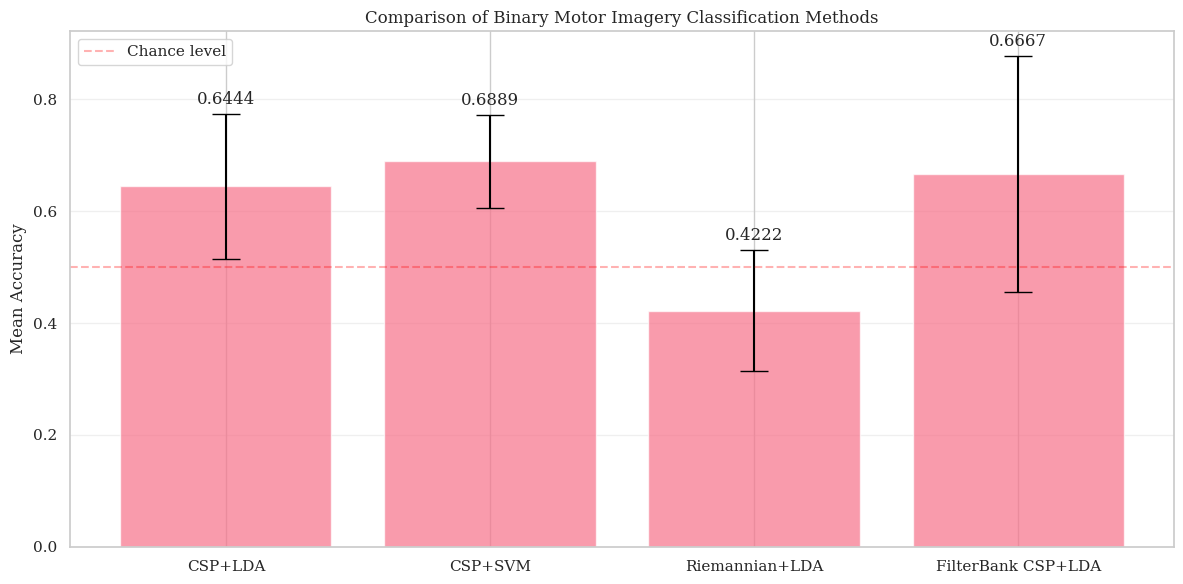


Method comparison completed!


In [25]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import moabb
from moabb.datasets import PhysionetMI
from moabb.paradigms import MotorImagery
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mne.decoding import CSP
from pyriemann.estimation import Covariances
from pyriemann.tangentspace import TangentSpace
import warnings
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Filter unnecessary warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# Create MNE data directory
mne_data_dir = '/content/mne_data'
os.makedirs(mne_data_dir, exist_ok=True)
mne.set_config('MNE_DATA', mne_data_dir, set_env=True)

# Print versions
print(f"MOABB version: {moabb.__version__}")
print(f"MNE version: {mne.__version__}")

# Initialize dataset
print("Loading PhysionetMI dataset...")
dataset = PhysionetMI()

# Limit to a few subjects for faster testing
dataset.subject_list = dataset.subject_list[:]
print(f"Using subjects: {dataset.subject_list}")

# Set up the motor imagery paradigm with all channels
print("Setting up preprocessing pipeline...")
paradigm = MotorImagery(
    n_classes=2,  # Binary classification
    fmin=8,       # Low frequency (mu rhythm)
    fmax=30,      # High frequency (beta rhythm)
    channels=None,  # Use all available channels
    resample=160    # Resample to 160 Hz
)

# Get the data for a subject
print("Getting preprocessed data...")
X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[1])
print(f"Data shape: X={X.shape}, y={y.shape}")
print(f"Unique classes: {np.unique(y)}")

# Select only left_hand and right_hand classes for binary classification
mask = np.logical_or(y == 'left_hand', y == 'right_hand')
if np.sum(mask) > 0:
    X = X[mask]
    y = y[mask]
    print(f"Filtered to binary classification (left_hand vs right_hand)")
    print(f"New data shape: X={X.shape}, y={y.shape}")

# Define the methods to compare
print("\nSetting up classification methods to compare...")

# Method 1: CSP + LDA (Common Spatial Patterns with Linear Discriminant Analysis)
csp_lda = make_pipeline(
    CSP(n_components=8),
    LDA(solver='svd')
)

# Method 2: CSP + SVM (Common Spatial Patterns with Support Vector Machine)
csp_svm = make_pipeline(
    CSP(n_components=8),
    SVC(kernel='linear', probability=True)
)

# Method 3: Riemannian Geometry approach (Covariances + Tangent Space + LDA)
rg_lda = make_pipeline(
    Covariances(estimator='oas'),
    TangentSpace(),
    LDA(solver='svd')
)

# Method 4: Filter Bank CSP + LDA (Multiple frequency bands)
class FilterBankCSP:
    def __init__(self, n_components=4, n_bands=5):
        self.n_components = n_components
        self.n_bands = n_bands
        self.filters = []

    def fit(self, X, y):
        # Create multiple frequency band CSP filters
        self.filters = []
        for i in range(self.n_bands):
            csp = CSP(n_components=self.n_components)
            csp.fit(X, y)
            self.filters.append(csp)
        return self

    def transform(self, X):
        # Apply all filters and concatenate
        features = []
        for csp in self.filters:
            features.append(csp.transform(X))
        return np.hstack(features)

fb_csp_lda = make_pipeline(
    FilterBankCSP(n_components=4, n_bands=3),
    LDA(solver='svd')
)

# Define all methods in a dictionary
methods = {
    'CSP+LDA': csp_lda,
    'CSP+SVM': csp_svm,
    'Riemannian+LDA': rg_lda,
    'FilterBank CSP+LDA': fb_csp_lda
}

# Compare all methods using cross-validation
results = {}
cv = 5  # 5-fold cross-validation

print("\nEvaluating all methods with 5-fold cross-validation:")
for name, pipeline in methods.items():
    print(f"\nEvaluating {name}...")
    scores = cross_val_score(pipeline, X, y, cv=cv)
    results[name] = scores
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

    # Fit the model on all data to get feature importance
    pipeline.fit(X, y)

    # Try to get more detailed model information if possible
    if name.startswith('CSP'):
        # Extract CSP patterns if available
        csp = pipeline.named_steps.get('csp', None)
        if csp is not None:
            # Show top channels by importance
            patterns = csp.patterns_
            feature_importance = np.abs(patterns).mean(axis=1)
            top_indices = np.argsort(feature_importance)[::-1][:10]  # Top 10
            print("\nTop 10 channels by importance:")
            for i, idx in enumerate(top_indices):
                print(f"  Rank {i+1}: Channel {idx}, Importance: {feature_importance[idx]:.4f}")

# Visualize comparison results
plt.figure(figsize=(12, 6))
all_scores = [results[method] for method in methods]
plt.boxplot(all_scores, labels=list(methods.keys()))
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Chance level')
plt.ylabel('Accuracy')
plt.title('Comparison of Binary Motor Imagery Classification Methods')
plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Plot mean accuracies with error bars
plt.figure(figsize=(12, 6))
mean_scores = [np.mean(results[method]) for method in methods]
std_scores = [np.std(results[method]) for method in methods]
bars = plt.bar(range(len(methods)), mean_scores, yerr=std_scores,
               capsize=10, alpha=0.7)
plt.xticks(range(len(methods)), list(methods.keys()))
plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.3, label='Chance level')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Binary Motor Imagery Classification Methods')
plt.grid(axis='y', alpha=0.3)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + std_scores[i] + 0.01,
             f'{mean_scores[i]:.4f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

print("\nMethod comparison completed!")